<a href="https://colab.research.google.com/github/AlvaroUriel/idal_ia3/blob/main/tfm_v0_4_011122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from  google.colab import drive
 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#Imports
from tensorflow import keras
import matplotlib.pyplot as plt; 
import matplotlib.patches as patches
from tensorflow.keras.utils import load_img
import xml.etree.ElementTree as ET

# Keras
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import imagenet_utils
from tensorflow.keras.utils import load_img, img_to_array
from keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

import cv2
from google.colab.patches import cv2_imshow

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 
import matplotlib.image as img
from numpy.core.fromnumeric import argmax

##Data analysis

In [4]:
test_img_path = '/content/drive/MyDrive/IA3/TFM/archive/images/BikesHelmets0.png'
test_dat_path = '/content/drive/MyDrive/IA3/TFM/archive/annotations/BikesHelmets0.xml'

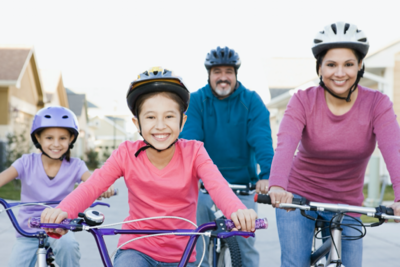

In [5]:
#image = load_img(test_img_path)
#plt.imshow(image) 

cv2_imshow(cv2.imread(test_img_path))

In [6]:
xml_file = open(test_dat_path)
print(xml_file.read())


<annotation>
    <folder>images</folder>
    <filename>BikesHelmets0.png</filename>
    <size>
        <width>400</width>
        <height>267</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>29</xmin>
            <ymin>105</ymin>
            <xmax>82</xmax>
            <ymax>160</ymax>
        </bndbox>
    </object>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>122</xmin>
            <ymin>66</ymin>
            <xmax>193</xmax>
            <ymax>154</ymax>
        </bndbox>
    </object>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</tr

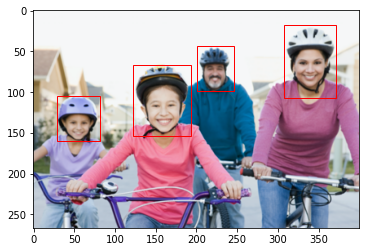

In [7]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
image = load_img(test_img_path)
ax.imshow(image)

tree=ET.parse(test_dat_path)

for element in tree.findall('object'):

    xmin = int(element.find("bndbox").find('xmin').text)
    ymin = int(element.find("bndbox").find('ymin').text)
    xmax = int(element.find("bndbox").find('xmax').text)
    ymax = int(element.find("bndbox").find('ymax').text)

    h = ymax - ymin
    w = xmax - xmin

    # Create a Rectangle patch
    rect = patches.Rectangle((int(xmin), int(ymin)), int(w), int(h), linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

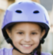

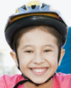

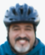

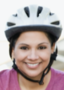

In [8]:
#Example of cropped bounding boxes
tree=ET.parse(test_dat_path)

# Create figure and axes
img = cv2.imread(test_img_path)

for element in tree.findall('object'):

    xmin = int(element.find("bndbox").find('xmin').text)
    ymin = int(element.find("bndbox").find('ymin').text)
    xmax = int(element.find("bndbox").find('xmax').text)
    ymax = int(element.find("bndbox").find('ymax').text)

    h = ymax - ymin
    w = xmax - xmin

    # Cropping an image
    cropped_image = img[ymin:ymax, xmin:xmax, ]
    
    # Display cropped image
    cv2_imshow(cropped_image)

    plt.show()

##Data preprocessing

In [9]:
bCropImages = 0
if(bCropImages):

  img_path      = '/content/drive/MyDrive/IA3/TFM/archive/images/'
  xml_path      = '/content/drive/MyDrive/IA3/TFM/archive/annotations/'
  img_crop_path = '/content/drive/MyDrive/IA3/TFM/archive/croppedImages0/'
  cont=[0,0]
  cont_element = 0

  contenido = os.listdir(img_path)

  for fichero in contenido:
    if fichero.endswith('.png'):
      
      img = cv2.imread(img_path+fichero)
      tree=ET.parse(xml_path+fichero[:-3]+'xml')

      cont_element = 0

      for element in tree.findall('object'):

        clase = int(np.invert('Without' in element.find("name").text))
        xmin = int(element.find("bndbox").find('xmin').text)
        ymin = int(element.find("bndbox").find('ymin').text)
        xmax = int(element.find("bndbox").find('xmax').text)
        ymax = int(element.find("bndbox").find('ymax').text)

        h = ymax - ymin
        w = xmax - xmin

        # Cropping an image
        cropped_image = img[ymin:ymax, xmin:xmax]

        if cropped_image.shape[0]==0 and cropped_image.shape[1]==0:
          print(fichero + ' object: ' + str(cont_element) + ' is empty!')
        else:
          cv2.imwrite(img_crop_path + str(clase) + '_' + str(cont[clase]) + '_' + fichero[:-4] + '.png', cropped_image)
          cont[clase] = cont[clase] + 1
        
        cont_element = cont_element +1



In [10]:
#Visual correction of labels

wrong_label_images =['BikesHelmets78.',
                     'BikesHelmets601.',
                     'BikesHelmets573.',
                     'BikesHelmets517.',
                     'BikesHelmets424.',
                     'BikesHelmets375.',
                     'BikesHelmets291.',
                     'BikesHelmets154.',
                     'BikesHelmets752.',
                     'BikesHelmets186.',
                     'BikesHelmets182.',
                     'BikesHelmets45.',
                     'BikesHelmets296.',
                     'BikesHelmets281.',
                     'BikesHelmets446.']
wrong_label_images

['BikesHelmets78.',
 'BikesHelmets601.',
 'BikesHelmets573.',
 'BikesHelmets517.',
 'BikesHelmets424.',
 'BikesHelmets375.',
 'BikesHelmets291.',
 'BikesHelmets154.',
 'BikesHelmets752.',
 'BikesHelmets186.',
 'BikesHelmets182.',
 'BikesHelmets45.',
 'BikesHelmets296.',
 'BikesHelmets281.',
 'BikesHelmets446.']

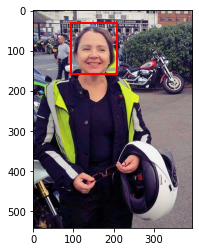

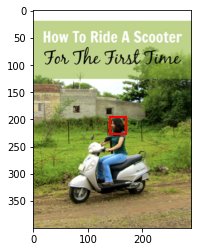

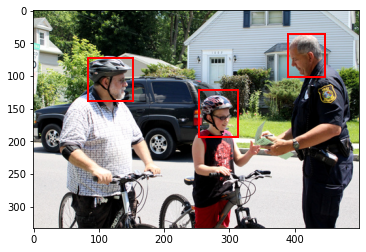

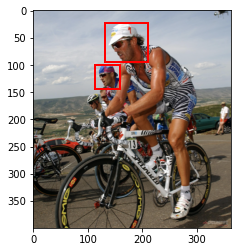

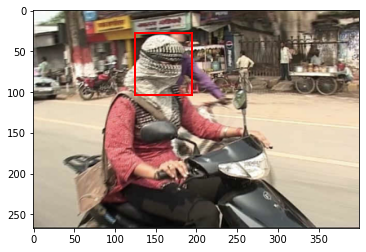

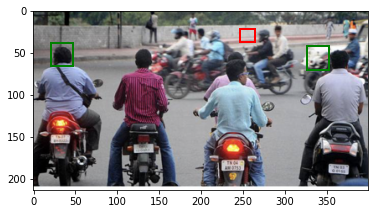

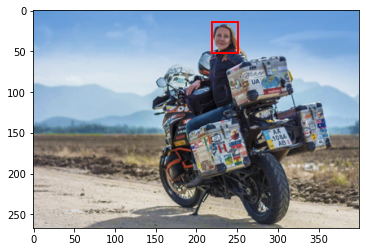

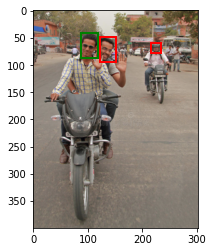

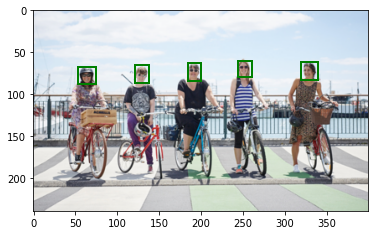

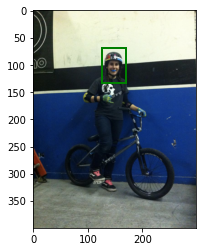

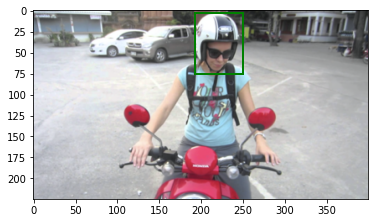

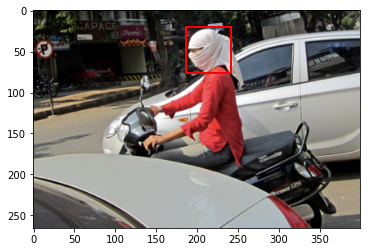

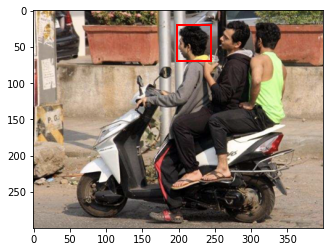

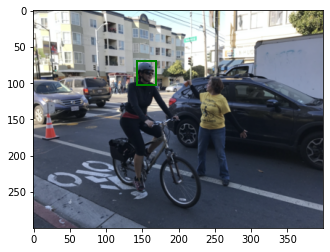

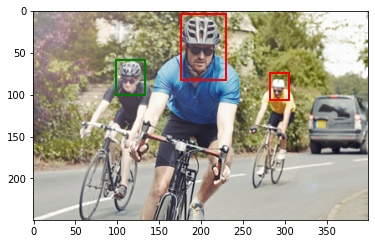

In [12]:
#Red rectangles means labeled as helmet, green ones as no helmet

img_path      = '/content/drive/MyDrive/IA3/TFM/archive/images/'
xml_path      = '/content/drive/MyDrive/IA3/TFM/archive/annotations/'
img_crop_path = '/content/drive/MyDrive/IA3/TFM/archive/croppedImages0/'

for my_img in wrong_label_images:

  # Create figure and axes
  fig, ax = plt.subplots()

  # Display the image

  image = load_img(img_path+my_img+'png')
  ax.imshow(image)

  tree=ET.parse(xml_path+my_img+'xml')

  for element in tree.findall('object'):

      if('With Helmet' in element.find("name").text):
        colorHelmet = 'r'
      else:
        colorHelmet = 'g'

      xmin = int(element.find("bndbox").find('xmin').text)
      ymin = int(element.find("bndbox").find('ymin').text)
      xmax = int(element.find("bndbox").find('xmax').text)
      ymax = int(element.find("bndbox").find('ymax').text)

      h = ymax - ymin
      w = xmax - xmin

      # Create a Rectangle patch
      rect = patches.Rectangle((int(xmin), int(ymin)), int(w), int(h), linewidth=2, edgecolor=colorHelmet, facecolor='none')

      # Add the patch to the Axes
      ax.add_patch(rect)

  plt.show()

In [13]:
bCropImages = 0
if(bCropImages):

  img_path      = '/content/drive/MyDrive/IA3/TFM/archive/images/'
  xml_path      = '/content/drive/MyDrive/IA3/TFM/archive/annotations/'
  img_crop_path = '/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/'
  cont=[0,0]
  cont_element = 0

  contenido = os.listdir(img_path)

  for fichero in contenido:
    
    if fichero[:-3] in wrong_label_images:
      print('Omitida:' + fichero) 
    else:
      if fichero.endswith('.png'):
        
        img = cv2.imread(img_path+fichero)
        tree=ET.parse(xml_path+fichero[:-3]+'xml')

        cont_element = 0

        for element in tree.findall('object'):

          clase = int(np.invert('Without' in element.find("name").text))
          xmin = int(element.find("bndbox").find('xmin').text)
          ymin = int(element.find("bndbox").find('ymin').text)
          xmax = int(element.find("bndbox").find('xmax').text)
          ymax = int(element.find("bndbox").find('ymax').text)

          h = ymax - ymin
          w = xmax - xmin

          # Cropping an image
          cropped_image = img[ymin:ymax, xmin:xmax]

          if cropped_image.shape[0]==0 and cropped_image.shape[1]==0:
            print(fichero + ' object: ' + str(cont_element) + ' is empty!')
          else:
#           cv2.imwrite(img_crop_path + str(clase) + '_' + str(cont[clase]) + '_' + fichero[:-4] + '.png', cropped_image)
            if(h<24) or (w<24):
              print(fichero + ' object: ' + str(cont_element) + ' is too small!')
            else:
              cv2.imwrite(img_crop_path + str(clase) + '__' + str(cont[clase]) + '_' + fichero[:-4] + '.png', cropped_image)
              cont[clase] = cont[clase] + 1
          
          cont_element = cont_element +1

##Training

In [14]:
data_path = '/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/'

#Creamos listas con todos los nombres de los ficheros 
data_0=[]
data_1=[]

for img in os.listdir(data_path):
  if '0__' in img:
    data_0.append(os.path.join(data_path,img))
  else:
    data_1.append(os.path.join(data_path,img))

print(len(os.listdir(data_path)), len(data_0), len(data_1), len(data_0) + len(data_1))

1100 312 788 1100


In [15]:
from sklearn.model_selection import train_test_split

train_0, test_0 = train_test_split(data_0, test_size=0.4)
test_0, val_0 = train_test_split(test_0, test_size=0.5)

print(len(data_0), len(train_0), len(test_0), len(val_0))

train_1, test_1 = train_test_split(data_1, test_size=0.4)
test_1, val_1 = train_test_split(test_1, test_size=0.5)

print(len(data_1), len(train_1), len(test_1), len(val_1))

312 187 62 63
788 472 158 158


In [16]:
train_0[0:3]

['/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/0__56_BikesHelmets293.png',
 '/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/0__168_BikesHelmets523.png',
 '/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/0__38_BikesHelmets212.png']

In [17]:
train_1[0:3]

['/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/1__520_BikesHelmets520.png',
 '/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/1__272_BikesHelmets311.png',
 '/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/1__299_BikesHelmets337.png']

In [18]:
num_classes = 2
y = []

for img in train_0:
  y.append(0) 

y_train_0 = np_utils.to_categorical(y, num_classes)

In [19]:
y = []

for img in train_1:
  y.append(1) 

y_train_1 = np_utils.to_categorical(y, num_classes)

In [20]:
y = []

for img in test_0:
  y.append(0) 

y_test_0 = np_utils.to_categorical(y, num_classes)

In [21]:
y = []

for img in test_1:
  y.append(1) 

y_test_1 = np_utils.to_categorical(y, num_classes)

In [22]:
y = []

for img in val_0:
  y.append(0) 

y_val_0 = np_utils.to_categorical(y, num_classes)

In [23]:
y = []

for img in val_1:
  y.append(1) 

y_val_1 = np_utils.to_categorical(y, num_classes)

In [24]:
y_train = np.concatenate([y_train_0, y_train_1])
y_test = np.concatenate([y_test_0, y_test_1])
y_val = np.concatenate([y_val_0, y_val_1])
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(659, 2)
(220, 2)
(221, 2)


In [25]:
train = train_0 + train_1
test = test_0 + test_1
val = val_0 + val_1
print(len(train))
print(len(test))
print(len(val))


659
220
221


In [26]:
#Clase para mostrar imagenes
def show_imgs(X):
    plt.figure(figsize=(14, 14))
    k = 0
    #k= np.random.randint(0, len(X)-1-16)

    for i in range(0,4):
        for j in range(0,4):
            image = load_img(train[k], target_size=(224, 224))
            ax = plt.subplot2grid((4,4),(i,j))
            #ax.set_title('Clase: ' + str(y_train[k]) ) 
            if(y_train[k][0]):
              ax.set_title('Clase: ' + str(y_train[k]) + ' Without Helment') 
            else:
              ax.set_title('Clase: ' + str(y_train[k]) + ' With Helment') 
            plt.subplots_adjust(hspace=0.5)    
            plt.imshow(image)            
            #k = k+1
            k= np.random.randint(0, len(X)-1-16)
    #Muestra
    plt.show()

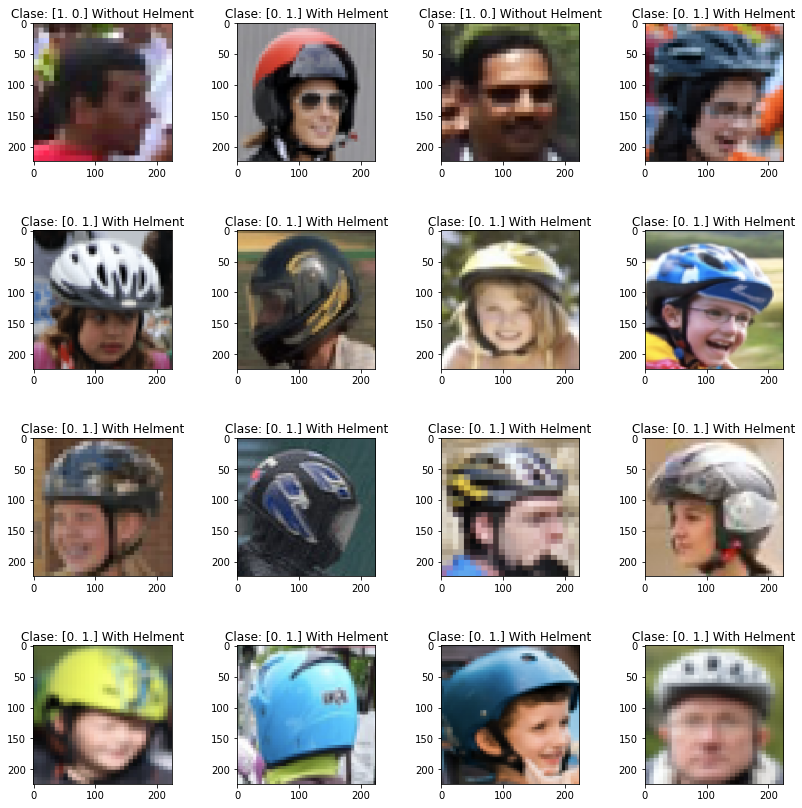

In [30]:
show_imgs(train)


In [31]:
def create_features(dataset):
 
    x_scratch = []

    k=0

    #Bucle sobre las imagenes
    for imagePath in dataset:
 
        #Se cargan las imagenes a tamaño 224
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)

        k = k+1
        #print('convertida:', k, ' de ', len(dataset))
 
    x = np.vstack(x_scratch)
    return x

In [32]:
train_x = create_features(train)
val_x = create_features(val)
test_x = create_features(test)
print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

(659, 224, 224, 3)
(221, 224, 224, 3)
(220, 224, 224, 3)


In [34]:
# Creating a checkpointer
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5',
                               verbose=1,save_best_only=True)
# load the VGG16 network
print("[INFO loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=train_x.shape[1:])
model_vgg.summary()

[INFO loading network...
58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                     

In [41]:
# Freeze the layers except the last 9 layers
for layer in model_vgg.layers[:-9]:
    #layer.trainable = True
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in model_vgg.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fc53f13b210> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc53f031e50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc53f6942d0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fc53f1016d0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc53f12d890> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc53f28ec10> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fc5401c2e50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc5401b7d50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc5401ece50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc5401bb410> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fc53f101a10> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc53f2a4fd0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc5404ade10> True
<keras.layers.convolution

In [42]:
model_transfer_full = Sequential()
model_transfer_full.add(model_vgg)
model_transfer_full.add(GlobalAveragePooling2D())
model_transfer_full.add(Dropout(0.2))
model_transfer_full.add(Dense(100, activation='relu'))
model_transfer_full.add(Dense(num_classes, activation='softmax'))
model_transfer_full.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               51300     
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                                 
Total params: 14,766,190
Trainable params: 13,030,702
Non-trainable params: 1,735,488
__________________________________

In [43]:
opt = Adam(learning_rate=0.00001)
model_transfer_full.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model_transfer_full.fit(train_x, y_train, batch_size=32, epochs=10,
          validation_data=(val_x, y_val), callbacks=[checkpointer],verbose=1, shuffle=True)

Epoch 1/10
21/21 [==============================] - ETA: 0s - loss: 0.8609 - accuracy: 0.7041
Epoch 1: val_loss improved from inf to 0.50052, saving model to scratchmodel.best.hdf5
21/21 [==============================] - 24s 531ms/step - loss: 0.8609 - accuracy: 0.7041 - val_loss: 0.5005 - val_accuracy: 0.7240
Epoch 2/10
21/21 [==============================] - ETA: 0s - loss: 0.4746 - accuracy: 0.7375
Epoch 2: val_loss improved from 0.50052 to 0.44759, saving model to scratchmodel.best.hdf5
21/21 [==============================] - 6s 281ms/step - loss: 0.4746 - accuracy: 0.7375 - val_loss: 0.4476 - val_accuracy: 0.7738
Epoch 3/10
21/21 [==============================] - ETA: 0s - loss: 0.3626 - accuracy: 0.8346
Epoch 3: val_loss improved from 0.44759 to 0.40350, saving model to scratchmodel.best.hdf5
21/21 [==============================] - 6s 283ms/step - loss: 0.3626 - accuracy: 0.8346 - val_loss: 0.4035 - val_accuracy: 0.8100
Epoch 4/10
21/21 [==============================] - ETA

##Test

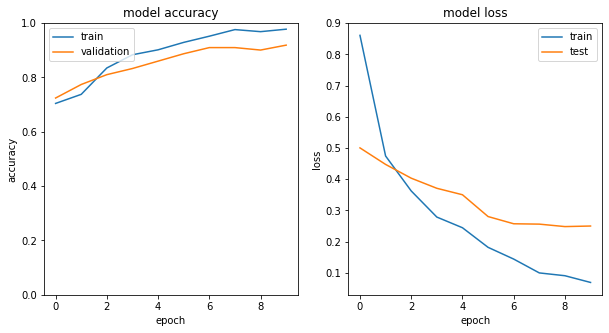

In [44]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
 
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.ylim([0, 1])
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
 
plot_accuracy_loss(history)

In [45]:
test_y=[]

for i in y_test:
  test_y.append(np.argmax(i))

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
preds = np.argmax(model_transfer_full.predict(test_x), axis=1)
print("\nAccuracy on Test Data: ", accuracy_score(test_y, preds))
print("\nNumber of correctly identified imgaes: ",
      accuracy_score(test_y, preds, normalize=False),"\n")
confusion_matrix(test_y, preds, labels=range(0,num_classes))

7/7 [==============================] - 4s 563ms/step

Accuracy on Test Data:  0.9090909090909091

Number of correctly identified imgaes:  200 



array([[ 44,  18],
       [  2, 156]])

##Validation

Ground truth:  1   With helmet
1/1 [==============================] - 0s 21ms/step
Predict:       1   With helmet


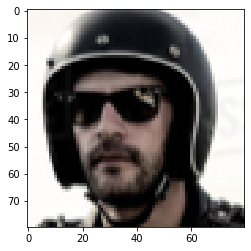

In [69]:
import matplotlib.image as img

classes_names = ('Without helmet','With helmet')

id=np.random.randint(0, len(val)-1)

image = img.imread(val[id])

plt.imshow(image[:,:,:], cmap='gray', vmin = 0, vmax = 255,interpolation='none')
print("Ground truth: ", y_val[id].argmax(), " ", classes_names[y_val[id].argmax()])
#plt.imshow(train_x[id])

p = model_transfer_full.predict(np.expand_dims(val_x[id], axis=0))
print("Predict:      ", p.argmax(), " ", classes_names[p.argmax()])